# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



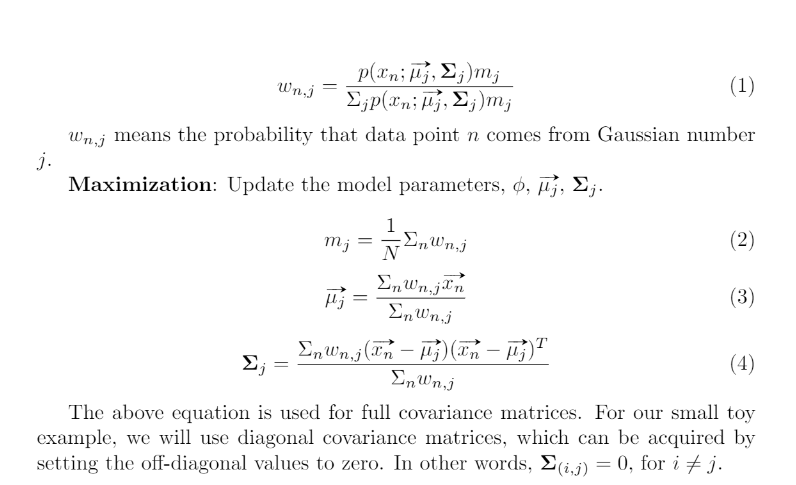

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [29]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """

        # INSERT CODE HERE
        w = np.zeros((data.shape[0], len(self.mixture_weight))) #(9, 3) which is (data points, no. of mixtures)
        
        for j in range(len(self.mixture_weight)):
            w[:, j] = multivariate_normal.pdf(data, self.mean_params[j], self.cov_params[j]) * self.mixture_weight[j]
        
        denominator = w.sum(axis=1, keepdims=True) # sum in row (9, ) and keepdims to be (9,1)
        w = w / denominator # denominator will broadcast from (9, 1) -> (9, 3)

        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        # INSERT CODE HERE
        self.mixture_weight = np.sum(w, axis=0) / data.shape[0]
        
        sum_weight = w.sum(axis=0, keepdims=True) # (1, 3)
        self.mean_params = np.dot(w.T, data) / sum_weight.T

        # self.cov_params shape is (no.mixtures, feaures, features)
        for j in range(len(self.mixture_weight)):
            # self.cov_params[j] = np.zeros(self.cov_params[j].shape)
            # for i in range(data.shape[0]):
            #     diff = np.reshape(data[i] - self.mean_params[j], (2, 1))
            #     self.cov_params[j] += w[i][j] * np.dot(diff, diff.T)
            # self.cov_params[j] = self.cov_params[j] / sum_weight[0, j]
            

            # Optimize with Vectorization. To understand, you need to imagine about linear algebra
            diff = data - self.mean_params[j]
            numerator = np.dot( (w[:, j:j+1] * diff).T, diff)
            
            self.cov_params[j] = numerator / sum_weight[0, j]

            self.cov_params[j] = np.diag(np.diag(self.cov_params[j])) # Inner: takes 2D matrix as input and 1D vector as output, Outer: takes 1D as input and 2D Matrix as output

    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        # INSERT CODE HERE
        # log_prob = 0
        # for i in range(data.shape[0]):
        #     s = 0
        #     for j in range(len(self.mixture_weight)):
        #         s += multivariate_normal.pdf(data, self.mean_params[j], self.cov_params[j]) * self.mixture_weight[j]
        #     log_prob += np.log(s)

        # Vectorization
        prob_matrix = np.zeros((data.shape[0], len(self.mixture_weight)))
        for j in range(len(self.mixture_weight)):
             prob_matrix[:, j] = multivariate_normal.pdf(data, self.mean_params[j], self.cov_params[j]) * self.mixture_weight[j]
        
        p_x = prob_matrix.sum(axis=1) # sum of each row 
        
        return np.sum(np.log(p_x))

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE
            w = self.estimation_step(data)
            self.maximization_step(data, w)
            

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [17]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1 / num_mixture] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture) # There's two features x and y. Also depth is number of mixtures
# print(cov_params.shape)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T
# print(data.shape)

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

Initialization
m :
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
--------------------

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



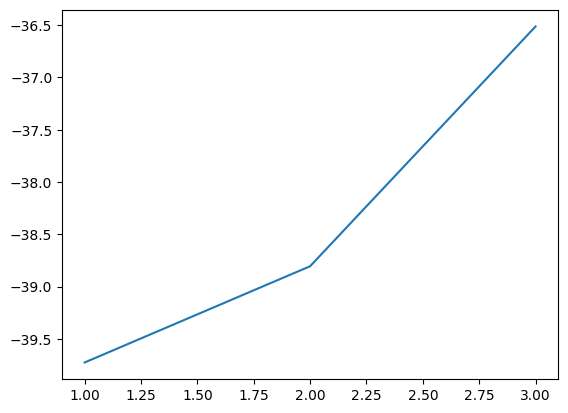

In [18]:
# TODO
x = np.array([1, 2, 3])

plt.plot(x, log_prob_list)
plt.show()

    ANS : YES

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



In [19]:
num_mixture = 2
mixture_weight = [1] * num_mixture

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight, mean_params, cov_params)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

Initialization
m :
 [1, 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

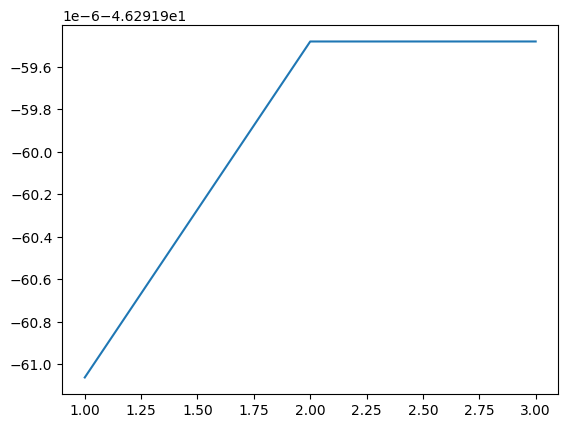

In [20]:
# TODO: Plot log_likelihood from T3
plt.plot(x, log_prob_list2)
plt.show()

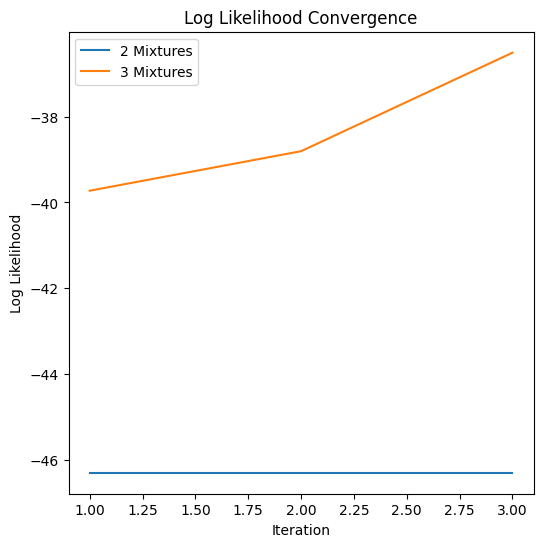

In [21]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.figure(figsize=(6, 6))
plt.plot(x, log_prob_list2, label="2 Mixtures")
plt.plot(x, log_prob_list, label="3 Mixtures")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Convergence')
plt.show()

    ANS : 3 Mixtures

### OT1

In [89]:
# num_mixture = 2
# mixture_weight = [1] * num_mixture

# X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
# data = np.vstack([X,Y]).T

# mean_params = np.array([[0,0], [10000, 10000]], dtype = float)
# cov_params = np.array([np.eye(2)] * num_mixture)

# # INSERT CODE HERE
# gmm3 = GMM(mixture_weight, mean_params, cov_params)
# log_prob_list3 = gmm3.perform_em_iterations(data, num_iterations)

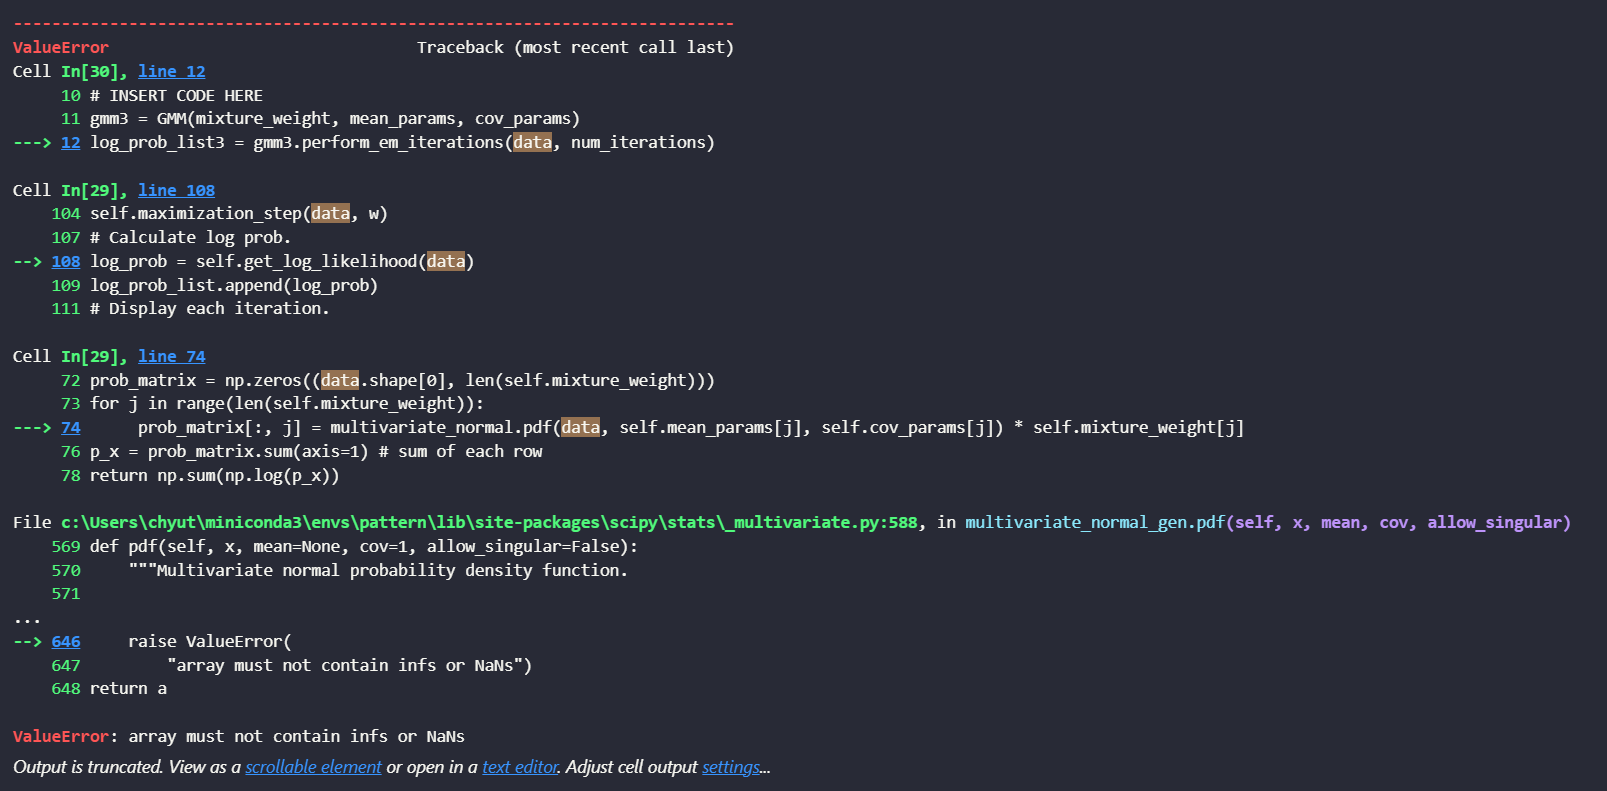

    ANS: The problem is that the probability is so close to zero, 
    so the 0/0 (NaN) appears. There're several ways recommended for 
    initialization such as random K points from the data or even 
    use K-Means' centroids as initialization points. Another trick 
    might be adding some small values when divide to prevent dividing 
    with zero.

# The face database

In [22]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [23]:
import os, zipfile

zip_path = 'facedata_mat.zip'
extract_to = '.'   

os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_to)

print('Done:', extract_to)

Done: .


In [31]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [32]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

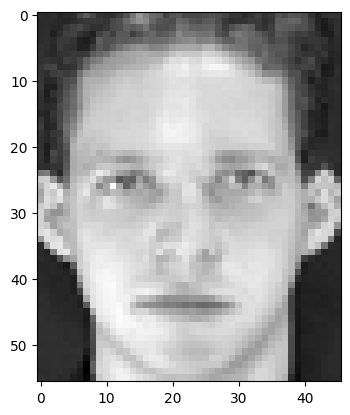

In [34]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [35]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2)) # np.sum already sum every axis in the array

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


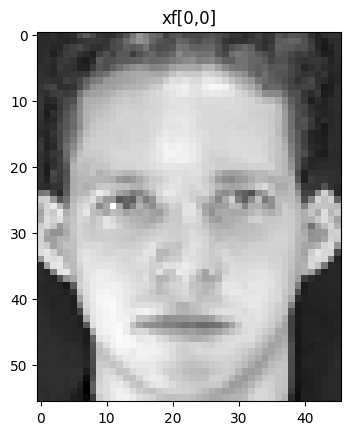

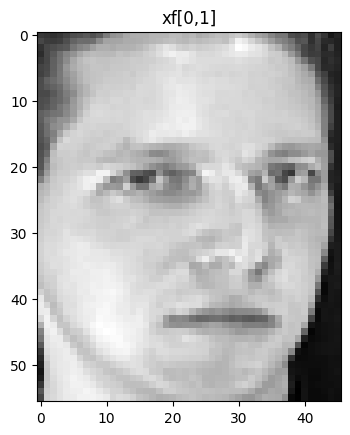

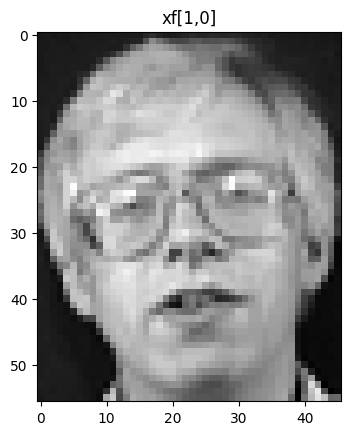

In [36]:
# TODO: Show why does the numbers make sense
plt.imshow(xf[0,0], cmap='gray')
plt.title("xf[0,0]")
plt.show()
plt.imshow(xf[0,1], cmap='gray')
plt.title("xf[0,1]")
plt.show()
plt.imshow(xf[1,0], cmap='gray')
plt.title("xf[1,0]")
plt.show()

    ANS : xf[0,0] is closer to x[1,0] than x[0,0] to x[0,1] 
    even if x[0,0] and x[0,1] is the same person is make sense 
    because the overall camera perspective of the image is the 
    same.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [37]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    return matrix.reshape(matrix.shape[0] * matrix.shape[1], -1)


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """

    # INSERT CODE HERE
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            similarity_matrix[i][j] = L2_dist(A[i], B[j])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

In [38]:
xf.shape

(40, 10, 56, 46)

(120, 2576)


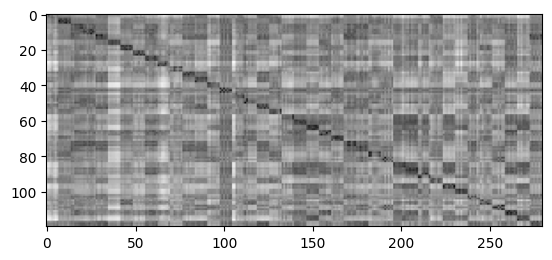

In [39]:
#TODO: Show similariry matrix between T and D.

# INSERT CODE HERE
T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])
print(T.shape)
similarity_matrix = generate_similarity_matrix(T, D)
plt.imshow(similarity_matrix, cmap='gray')
plt.show()

test if it works as in pdf

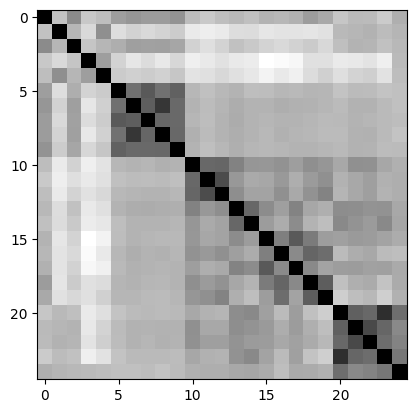

In [40]:
example_subset = xf[:5, :5]  


T_example = organize_shape(example_subset)
D_example = organize_shape(example_subset)

example_matrix = generate_similarity_matrix(T_example, D_example)
plt.imshow(example_matrix, cmap='gray')
plt.show()

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


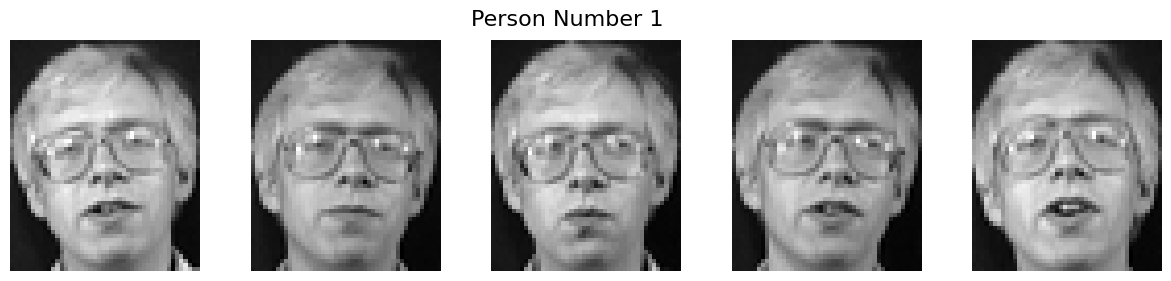

In [41]:
# INSERT CODE HERE
import matplotlib.pyplot as plt

def show_faces(person_index, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    fig.suptitle(f"Person Number {person_index}", fontsize=16)

    for i in range(num_images):
        img = xf[person_index, i]
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off') 
    plt.show()

show_faces(1)

        ANS : Each posture of person numbers two 
        have so less different, so that it appears 
        to be a black square.

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [42]:
def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """

    # INSERT CODE HERE
    true_pos_rate = 0
    false_pos_rate = 0
    true_neg_rate = 0
    false_neg_rate = 0

    for each_test in range(similarity_matrix.shape[1]):
        for each_train_person in range(similarity_matrix.shape[0] // 3):
            min_dist = min(similarity_matrix[each_train_person * 3 + 0][each_test], similarity_matrix[each_train_person * 3 + 1][each_test], similarity_matrix[each_train_person * 3 + 2][each_test])
            
            predict = 1 if min_dist < threshold else 0

            is_same_person = (each_test // 7 == each_train_person)

            if (predict == 1):
                if (is_same_person):
                    true_pos_rate += 1
                else:
                    false_pos_rate += 1
            elif (predict == 0):
                if (is_same_person):
                    false_neg_rate += 1
                else:
                    true_neg_rate += 1

    true_pos_rate /= (7 * 40 * 1)
    false_pos_rate /= (7 * 40 * 39)
    true_neg_rate /= (7 * 40 * 39)
    false_neg_rate /= (7 * 40 * 1)

    return true_pos_rate, false_pos_rate, true_neg_rate, false_neg_rate

# Quick check
# (true_pos_rate, false_pos_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)[:2]

(0.9928571428571429, 0.33507326007326005)

In [43]:
# INSERT CODE HERE
evaluate_performance(similarity_matrix, 10.0)[:2] 

(0.9964285714285714, 0.4564102564102564)

        ANS:(0.9964285714285714, 0.4564102564102564)

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [44]:
def calculate_roc(input_mat, threshold_list):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_pos_rate from the given matrix.
    """

    # INSERT CODE HERE
    tpr_list = []
    far_list = []
    tnr_list = []
    fnr_list = []
    for each_thresh in threshold_list:
        tpr, far, tnr, fnr = evaluate_performance(input_mat, threshold=each_thresh)
        tpr_list.append(tpr)
        far_list.append(far)
        tnr_list.append(tnr)
        fnr_list.append(fnr)

    return tpr_list, far_list, tnr_list, fnr_list

def plot_roc(input_mat):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    threshold_list = np.linspace(0, np.max(input_mat) * 1.05, 1000)

    tpr_list, far_list, tnr_list, fnr_list = calculate_roc(input_mat, threshold_list)
    
    plt.title('RoC')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('False Alarm Rate (False Positive Rate)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.plot(far_list, tpr_list)
    plt.grid(True)
    plt.legend()
    plt.show()

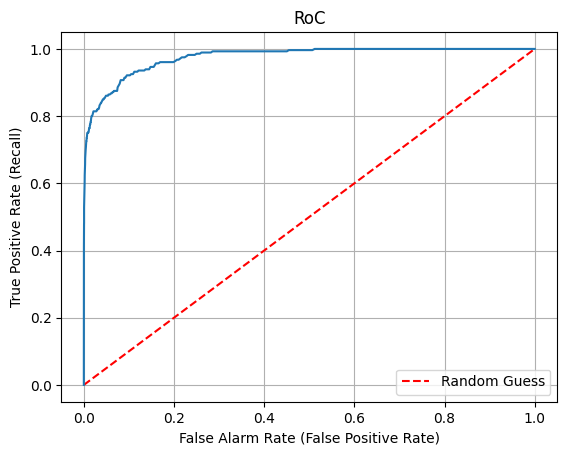

In [45]:
# INSERT CODE HERE
plot_roc(similarity_matrix)

    ANS: Minimum Threshold should be 0 because MSE 
    always greater than or equal to zero, also the 
    maximum threshold should be the max value in the 
    MSE matrix.

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



Recall rate at 0.1% false alarm rate: 0.5464285714285714
EER: 0.9142857142857143


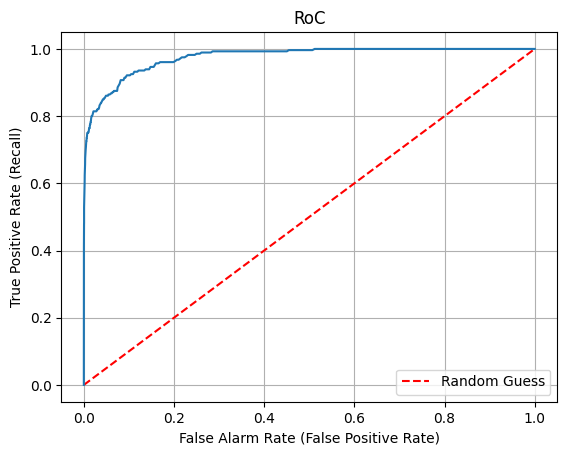

In [46]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

def plot_roc(input_mat, far_percent):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    # INSERT CODE HERE
    threshold_list = np.linspace(0, np.max(input_mat) * 1.05, 1000)

    tpr_list, far_list, tnr_list, fnr_list = calculate_roc(input_mat, threshold_list)

    # Recall Rate
    far_rate = far_percent / 100
    far_arr = np.array(far_list)
    print(f"Recall rate at {far_percent}% false alarm rate: {tpr_list[np.argmin(np.abs(far_arr - far_rate))]}")
    
    # EER
    tpr_arr = np.array(tpr_list)
    frr_arr = 1 - tpr_arr

    print(f"EER: {tpr_list[np.argmin(np.abs(far_arr - frr_arr))]}")

    plt.title('RoC')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('False Alarm Rate (False Positive Rate)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.plot(far_list, tpr_list)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_roc(similarity_matrix, 0.1)

    ANS: 0.9142857142857143

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

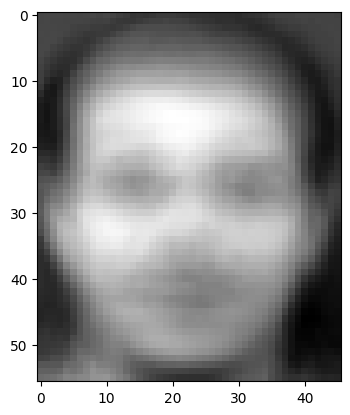

In [47]:
# INSERT CODE HERE
avg = np.mean(T, axis=0)
meanface = avg.reshape((56, 46))
plt.imshow(meanface, cmap='gray')
plt.show()

In [48]:
T.shape

(120, 2576)

In [49]:
meanface.reshape((1, meanface.shape[0] * meanface.shape[1]))

array([[0.33444444, 0.33598039, 0.33611111, ..., 0.2780719 , 0.27924837,
        0.27715686]], shape=(1, 2576))

In [50]:
X = T - meanface.reshape((1, meanface.shape[0] * meanface.shape[1]))

In [51]:
X.shape

(120, 2576)

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


    ANS: Size of covariance matrix is 
    #features x #features = 2576 x 2576
    Also, rank is min(N-1, #features) 
    = min(120-1, 2576) = 119 


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [52]:
# TODO: Compute gram matrix.
gram_matrix = X @ X.T # In theory, N its DxN, but our X is NxD

In [54]:
# TODO: Show size and rank of Gram matrix.
print(gram_matrix.shape)
print(119)

(120, 120)
119


    ANS: Size of Gram matrix is NxN = 120x120 and rank
     = min(120-1, 2576) = 119. Of course, number of 
     non-zerp eigenvalues we expect to get is equal 
     to rank which is 119.

## T14. Is the Gram matrix also symmetric? Why?


    ANS: Yes, we can easily proof by matrix property. 
    gram_matrix = X @ X.T, so gram_matrix.T = (X @ X.T).T 
    = (X.T.T @ X.T) = X @ X.T 
    We can conclude that it is symmetry as 
    gram_matrix.T = gram_matrix.

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [55]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """

    # INSERT CODE HERE
    eigenvalues, eigenvectors = np.linalg.eigh(gram_matrix)
    
    idx = np.argsort(eigenvalues)[::-1]

    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [56]:
print(eigenvalues)
print(eigenvectors)

[1.42392971e+03 8.75375177e+02 5.58624400e+02 4.07347157e+02
 3.71021274e+02 2.63280801e+02 2.03396990e+02 1.90965101e+02
 1.66548056e+02 1.43570551e+02 1.22951200e+02 1.04788229e+02
 9.36606993e+01 8.52020934e+01 8.00790884e+01 7.22926270e+01
 6.92896016e+01 6.55557914e+01 6.16791259e+01 5.90743553e+01
 5.42659430e+01 5.19180210e+01 4.60439029e+01 4.49517564e+01
 4.38154370e+01 4.17882938e+01 4.04839086e+01 3.80160594e+01
 3.72939497e+01 3.42784031e+01 3.38082909e+01 3.24110643e+01
 3.01160763e+01 2.88090967e+01 2.76934934e+01 2.72362796e+01
 2.63193795e+01 2.55181270e+01 2.42531018e+01 2.33566654e+01
 2.24888684e+01 2.22128871e+01 2.13271981e+01 2.05964187e+01
 1.97567698e+01 1.91068901e+01 1.86898335e+01 1.81386227e+01
 1.79801629e+01 1.69617092e+01 1.63867949e+01 1.56952212e+01
 1.56409226e+01 1.50995911e+01 1.45534702e+01 1.38473352e+01
 1.37682769e+01 1.35139271e+01 1.31342609e+01 1.26436508e+01
 1.25449028e+01 1.22504780e+01 1.19612169e+01 1.17761188e+01
 1.13660679e+01 1.110350

In [57]:
eg_rank = eigenvalues > 1e-3
np.sum(eg_rank)

np.int64(119)

    ANS: 119 non-zero eigenvalues.

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

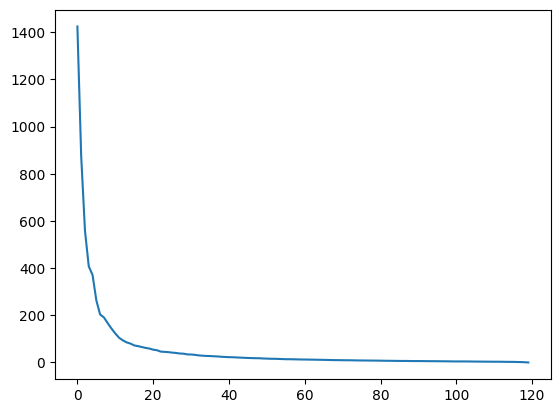

In [58]:
# INSERT CODE HERE
x = np.arange(0, 120, 1)
plt.plot(x, eigenvalues)
plt.show()

In [59]:
total_variance = np.sum(eigenvalues)
cutoff_variance = 0.95 * total_variance
cumulative_variance = np.cumsum(eigenvalues)
k_95 = np.argmax(cumulative_variance > cutoff_variance) + 1
k_95

np.int64(64)

    ANS: 63 eigenvectors.

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [60]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = X.T @ eigenvectors
v_norms = np.linalg.norm(v, axis=0) # v_norms gets what to be divide
v /= v_norms

In [61]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

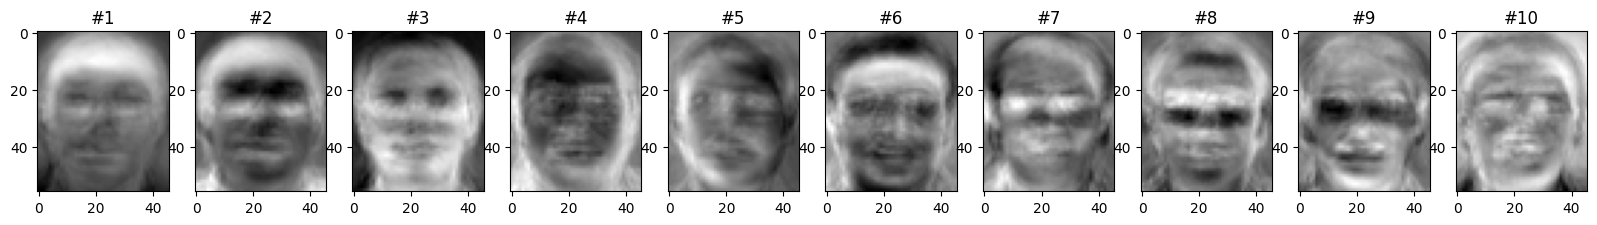

In [62]:
# TODO: Show the first 10 eigenvectors as images.
plt.figure(figsize=(20, 4)) 

for i in range(10):
    plt.subplot(1, 10, i+1) 
    
    tmp = v[:, i].reshape((56, 46))
    plt.imshow(tmp, cmap='gray')
    plt.title(f"#{i+1}")
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS: Most different parts is the zone in white.
    The first eigenvector captures the variance in 
    the head part as it is the brightest part in the 
    image. The second eigenvector captures the main 
    structure in the face like mouth, glasses, eyes.
    Anyway, both of the vectors still cannot capture 
    all the different as there are much more different 
    aspects such as posture, etc.

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [63]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """

    # INSERT CODE HERE
    mean_flat = meanface.reshape(1, -1)
    projection_vectors = (matrix - mean_flat) @ v

    return projection_vectors
    # projection_vectors = v.T @ (matrix - mean_flat).T

    # return projection_vectors.T # As math it should be (k, N), but for memory efficiency we use (N, k) instead

In [64]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v[:, :k])
D_reduced = calculate_projection_vectors(D, meanface, v[:, :k])


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k # As math it should be (k, N), but for memory efficiency we use (N, k) instead
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

In [66]:
# TODO: Get similarity matrix of T_reduced and D_reduced
reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

Recall rate at 0.1% false alarm rate: 0.5142857142857142
EER: 0.9214285714285714


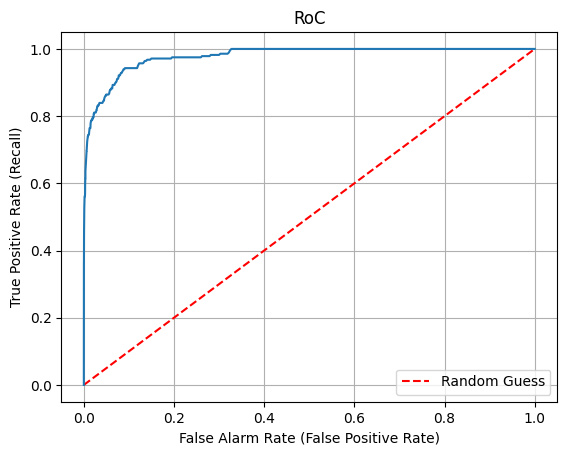

In [67]:
# TODO: Find EER and the recall rate at 0.1% FAR.
plot_roc(reduced_similarity_matrix, 0.1)

    ANS: 0.9214285714285714

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [68]:
# INSERT CODE HERE
best_err = 1e9
for k in range(5, 14+1):
    T_reduced_T20 = calculate_projection_vectors(T, meanface, v[:, :k])
    D_reduced_T20 = calculate_projection_vectors(D, meanface, v[:, :k])
    reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

    threshold_list = np.linspace(0, np.max(reduced_similarity_matrix) * 1.05, 1000)
    tpr_list, far_list, tnr_list, fnr_list = calculate_roc(reduced_similarity_matrix, threshold_list)
    tpr_arr = np.array(tpr_list)
    far_arr = np.array(far_list)
    frr_arr = 1 - tpr_arr
    idx = np.argmin(np.abs(far_arr - frr_arr))
    err = (far_arr[idx] + frr_arr[idx]) / 2
    print("k =", k, ", err =", err)
    if (err < best_err):
        best_err = err
        best_k = k

print("-" * 30)
print("Best k:", best_k, "with ERR:", best_err)

k = 5 , err = 0.07866300366300369
k = 6 , err = 0.07866300366300369
k = 7 , err = 0.07866300366300369
k = 8 , err = 0.07866300366300369
k = 9 , err = 0.07866300366300369
k = 10 , err = 0.07866300366300369
k = 11 , err = 0.07866300366300369
k = 12 , err = 0.07866300366300369
k = 13 , err = 0.07866300366300369
k = 14 , err = 0.07866300366300369
------------------------------
Best k: 5 with ERR: 0.07866300366300369


### OT2. Reconstruct using k=10, and find the MSE.

In [69]:
v[:, :10].shape

(2576, 10)

In [70]:
T_reduced[0].shape

(10,)

In [71]:
original_OT2 = T[0].reshape(-1, 1)
reconstruct_10 = v[:, :10] @ T_reduced[0].reshape(-1, 1) + meanface.reshape(-1, 1)

In [72]:
# original_OT2.shape
reconstruct_10.shape

(2576, 1)

In [73]:
mse_ot2 = np.sum((original_OT2 - reconstruct_10) ** 2) / reconstruct_10.shape[0]
print(f"MSE: {mse_ot2}")

MSE: 0.006148335016488305


### OT3. for k = 1,2,3,...,119 show the reconstructed images. Plot the MSE.

In [74]:
mse_ot3 = []
reconstructed_ot3 = []

mean_col = meanface.reshape(-1, 1)
original_ot3 = T[0].reshape(-1, 1)

# Reproject for every k
for k in range(1, 120): 
    v_k = v[:, :k]
    
    # Project to k dimensions
    p_k = v_k.T @ (original_ot3 - mean_col)

    # Reconstruct back
    reconstruct_k = v_k @ p_k + mean_col
    reconstructed_ot3.append(reconstruct_k)

    mse_tmp = np.sum((original_ot3 - reconstruct_k) ** 2) / original_ot3.shape[0]
    mse_ot3.append(mse_tmp)

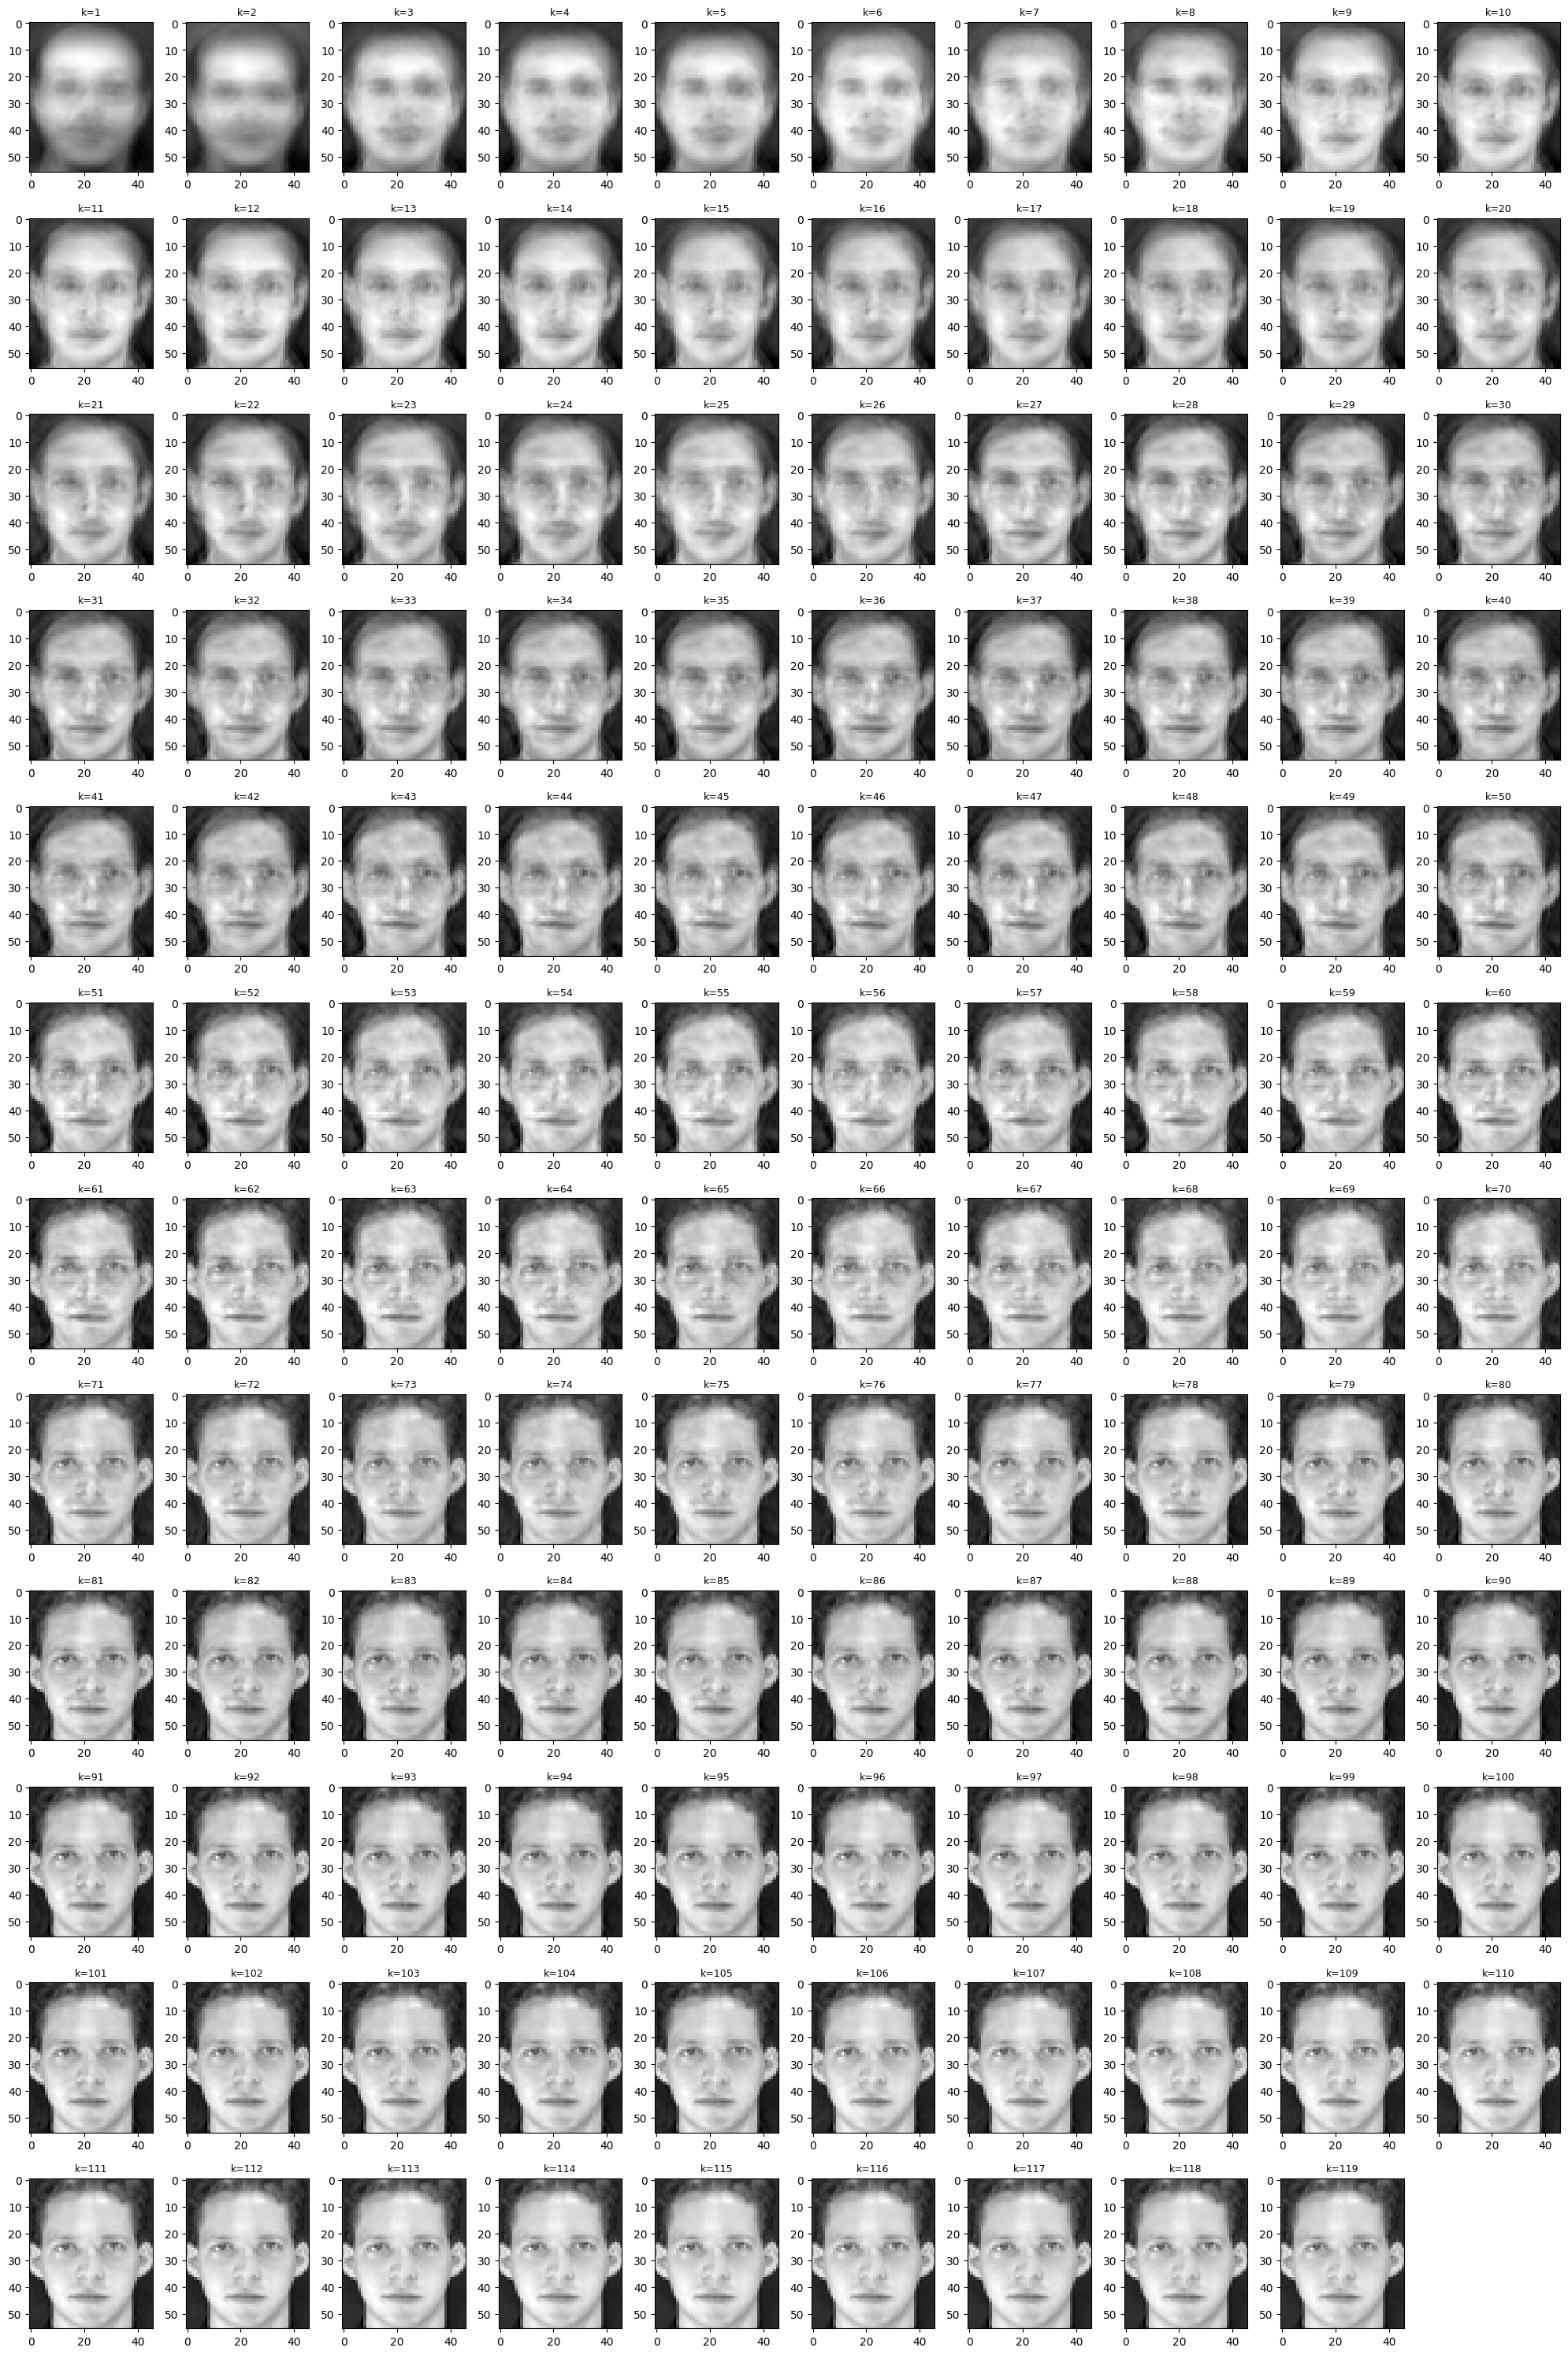

In [75]:
import matplotlib.pyplot as plt
import math

n_images = len(reconstructed_ot3) 

cols = 10
rows = math.ceil(n_images / cols)

plt.figure(figsize=(20, rows * 2.5)) 

for i, img in enumerate(reconstructed_ot3):
    k = i + 1
    plt.subplot(rows, cols, k)
    
    plt.imshow(img.reshape(56, 46), cmap='gray')
    
    plt.title(f"k={k}", fontsize=9)

plt.tight_layout()
plt.show()

[np.float64(0.01848695450969203), np.float64(0.016232644731309892), np.float64(0.010083926809950055), np.float64(0.010083926132523669), np.float64(0.010061224016363009), np.float64(0.009344143686155573), np.float64(0.008871378021262763), np.float64(0.008254991781399042), np.float64(0.006398962168451565), np.float64(0.006148335016488305), np.float64(0.0061310735251699135), np.float64(0.0061310671855099854), np.float64(0.00612258125644648), np.float64(0.0059827448477817275), np.float64(0.0055044366504223875), np.float64(0.00548080676902432), np.float64(0.005463413981611268), np.float64(0.0054313728563818615), np.float64(0.00541714049735082), np.float64(0.0052806323087349226), np.float64(0.005236184620240868), np.float64(0.005093705485875712), np.float64(0.0049350263064635224), np.float64(0.004834832539287241), np.float64(0.004684370125379025), np.float64(0.004308236202968825), np.float64(0.0038380216345364), np.float64(0.0038356250177574774), np.float64(0.003683806232822536), np.float64(

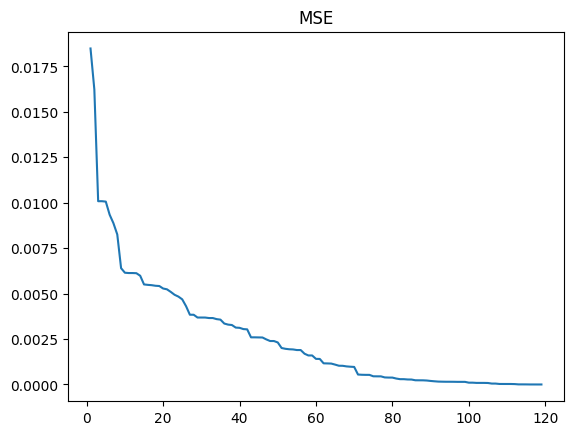

In [76]:
print(mse_ot3)
x = np.arange(1, 120, 1)
plt.plot(x, mse_ot3)
plt.title("MSE")
plt.show()

### OT4.

    ANS: For 1,000,000 images each there will be 
    56 * 46 pixels per images * 1000000 images 
    * 4 bytes per pixel = 10.3 GB (roughly). 
    If we compress the image by using only the 
    first 10 eigenvectors, we will need 10 
    features per image * 1000000 images 
    * 4 bytes per features + 10 eigenvectors 
    * 56*46 elements per eigenvectors 
    * 4 bytes per element = 40.1 MB (roughly)

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS: Sw rank is N-C = 120 - 40 = 80, but the 
    dimensions of Sw is 2576 x 2576. In order to 
    be full rank, we need to keep PCA dimensions 
    to 80.

In [77]:
# TODO: Define dimension of PCA.
n_dim = 80

# TODO: Find PCA of T and D with n_dim dimension.
T_reduced_LDA = calculate_projection_vectors(T, meanface, v[:, :n_dim])
D_reduced_LDA = calculate_projection_vectors(D, meanface, v[:, :n_dim])

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [78]:
T_reduced_LDA.shape

(120, 80)

In [79]:
# TODO: Find the LDA projection.
Sb = np.zeros((n_dim, n_dim))
Sw = np.zeros((n_dim, n_dim))

mean_global = np.mean(T_reduced_LDA, axis=0).reshape(-1, 1)
print(f"Mean LDA .shape: {mean_global.shape}")

for c in range(40):
    X_class = T_reduced_LDA[c*3 : (c+1)*3, :]
    mean_class = np.mean(X_class, axis=0).reshape(-1, 1)

    diff = mean_class - mean_global
    Sb += diff @ diff.T
    
    diffw = X_class.T - mean_class
    Sw += diffw @ diffw.T

eigenvaluesLDA, eigenvectorsLDA = np.linalg.eig(np.linalg.inv(Sw) @ Sb)
sort_index = np.argsort(eigenvaluesLDA)[::-1]

eigenvaluesLDA = eigenvaluesLDA[sort_index]
eigenvectorsLDA = eigenvectorsLDA[:, sort_index]
eigenvaluesLDA

Mean LDA .shape: (80, 1)


array([ 1.36917494e+07+0.00000000e+00j,  4.93597810e+03+0.00000000e+00j,
        1.44384617e+03+0.00000000e+00j,  7.48187352e+02+0.00000000e+00j,
        5.74469071e+02+0.00000000e+00j,  3.87183690e+02+0.00000000e+00j,
        2.48051664e+02+0.00000000e+00j,  1.71906841e+02+0.00000000e+00j,
        1.26585061e+02+0.00000000e+00j,  1.06607491e+02+0.00000000e+00j,
        7.67088363e+01+0.00000000e+00j,  7.22738617e+01+0.00000000e+00j,
        3.78927725e+01+0.00000000e+00j,  3.26640504e+01+0.00000000e+00j,
        3.18331255e+01+0.00000000e+00j,  2.49291868e+01+0.00000000e+00j,
        2.32673579e+01+0.00000000e+00j,  1.72583144e+01+0.00000000e+00j,
        1.43056638e+01+0.00000000e+00j,  1.25046335e+01+0.00000000e+00j,
        1.07063353e+01+0.00000000e+00j,  9.50022145e+00+0.00000000e+00j,
        8.02710020e+00+0.00000000e+00j,  6.57192475e+00+0.00000000e+00j,
        5.64011574e+00+0.00000000e+00j,  4.79227241e+00+0.00000000e+00j,
        4.47543662e+00+0.00000000e+00j,  4.09103860

In [80]:
eigenvaluesLDA.shape

(80,)

In [81]:
# TODO: Find how many non-zero eigenvalues there are.
eig_real = np.real(eigenvaluesLDA)
np.sum(eig_real > 1e-3)

np.int64(39)

    ANS: From the equations, nothing with the 
    matrix property guarantees the symmetry. So, 
    we use np.linalg.eig instead of np.linalg.eigh. 
    There are 39 non-zero eigenvalues.

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

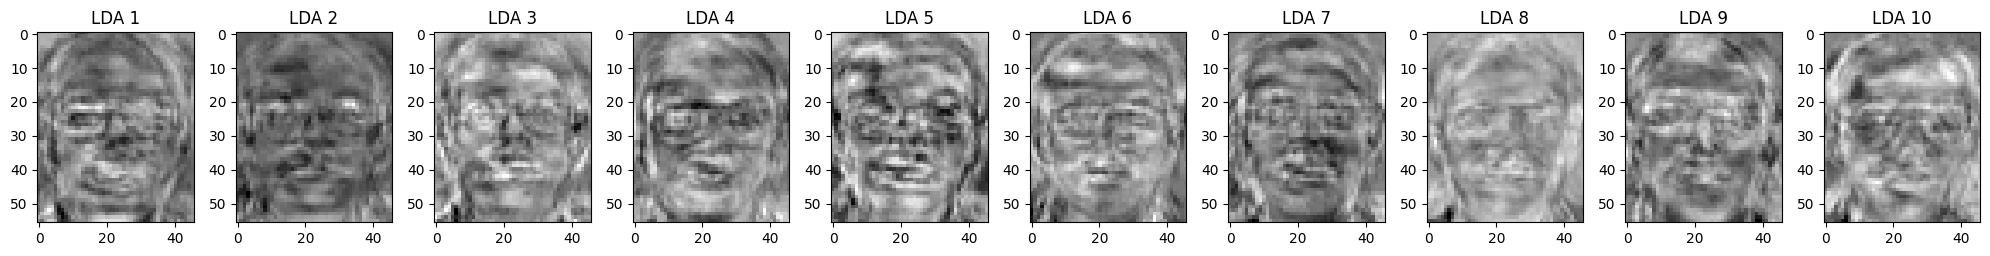

In [82]:
# INSERT CODE HERE
v_lda = eigenvectorsLDA[:, :10]

lda_images = np.real(v[:, :80] @ v_lda) # We plot eigenvectors, don't add the meanface
fig, axes = plt.subplots(1, 10, figsize=(20,3))

for i in range(lda_images.shape[1]):
    img = lda_images[:, i].reshape((56, 46))

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"LDA {i+1}")
plt.tight_layout()    
plt.show()

    ANS: PCA looks like each composition in 
    the face focusing on reconstruction. 
    LDA focus on the points where each class 
    differs the most.

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

Recall rate at 0.1% false alarm rate: 0.40714285714285714
EER: 0.8892857142857142


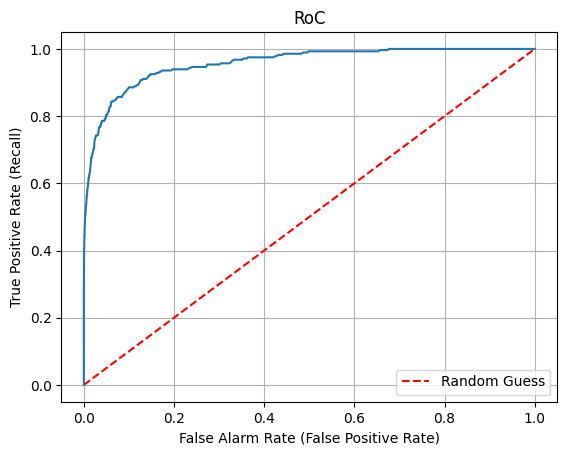

In [83]:
# INSERT CODE HERE
# PCA to 80 dim -> LDA to 10 dim (LDA has rank: 39)
w_lda = eigenvectorsLDA[:, :10]
T_fisher = np.real(T_reduced_LDA @ w_lda)
D_fisher = np.real(D_reduced_LDA @ w_lda)
LDA_similarity_matrix = generate_similarity_matrix(T_fisher, D_fisher)
plot_roc(LDA_similarity_matrix, 0.1)

    ANS: 0.8892857142857142

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

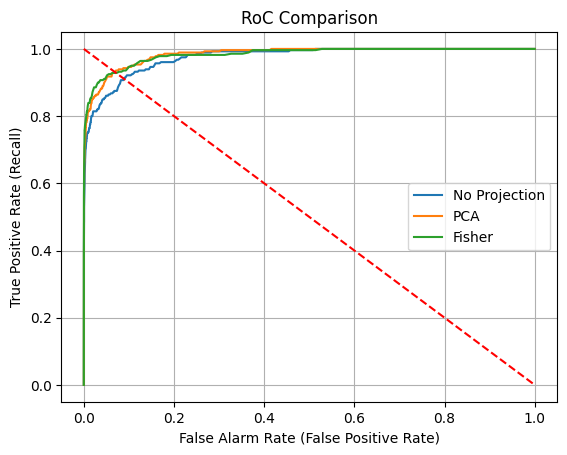

In [84]:
# INSERT CODE HERE
v_pca = v[:, :119]
T_reduced = calculate_projection_vectors(T, meanface, v_pca)
D_reduced = calculate_projection_vectors(D, meanface, v_pca)

w_lda = eigenvectorsLDA[:, :39]
T_fisher = np.real(T_reduced_LDA @ w_lda)
D_fisher = np.real(D_reduced_LDA @ w_lda)

no_projection_matrix = generate_similarity_matrix(T, D)
pca_matrix = generate_similarity_matrix(T_reduced, D_reduced)
fisher_matrix = generate_similarity_matrix(T_fisher, D_fisher)

threshold_list = np.linspace(0, max(np.max(no_projection_matrix), np.max(pca_matrix), np.max(fisher_matrix)), 1000)
tpr_list1, far_list1, tnr_list1, fnr_list1 = calculate_roc(no_projection_matrix, threshold_list)
tpr_list2, far_list2, tnr_list2, fnr_list2 = calculate_roc(pca_matrix, threshold_list)
tpr_list3, far_list3, tnr_list3, fnr_list3 = calculate_roc(fisher_matrix, threshold_list)

plt.plot(far_list1, tpr_list1, label="No Projection")
plt.plot(far_list2, tpr_list2, label="PCA")
plt.plot(far_list3, tpr_list3, label="Fisher")
plt.title("RoC Comparison")
plt.xlabel('False Alarm Rate (False Positive Rate)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot([0, 1], [1, 0], 'r--')
plt.legend()
plt.grid(True)
plt.show()

    ANS: about EER: Fisher is a little bit better than PCA 
    with not much difference. Both PCA and Fisher is kinda
    better than no projection. This might due to the dimensionality
    reduction made the noise dimension gone.

### OT5. Plot the first two LDA dimensions of the test images from different people (6 people 7 images each). Use a different color for each person. Observe the clustering of between each person. Repeat the same steps for the PCA projections. Does it come out as expected?

In [85]:
D_reduced_LDA.shape

(280, 80)

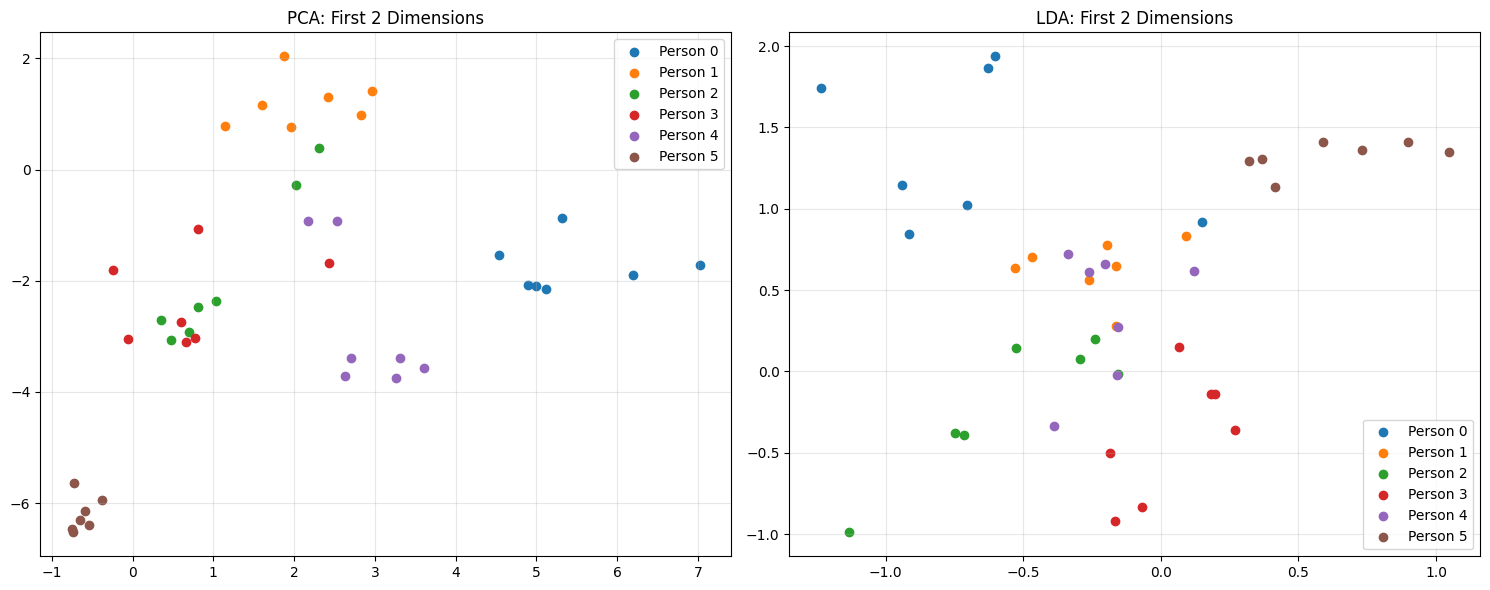

In [86]:
n_people = 6
img_per_person = 7

v_pca = v[:, :10]
T_reduced = calculate_projection_vectors(T, meanface, v_pca)
D_reduced = calculate_projection_vectors(D, meanface, v_pca)

w_lda = eigenvectorsLDA[:, :10]
T_fisher = np.real(T_reduced_LDA @ w_lda)
D_fisher = np.real(D_reduced_LDA @ w_lda)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PCA
for i in range(n_people):
    # D_reduced_LDA is the one we use PCA to project to 80 dimensions
    images = D_reduced[i * img_per_person:(i + 1) * img_per_person, :2] # first two LDA dimensions mean takes only first 2 columns
    axes[0].scatter(images[:, 0], images[:, 1], label=f"Person {i}")

axes[0].set_title("PCA: First 2 Dimensions")
axes[0].legend()
axes[0].grid(alpha=0.3)

# LDA
for i in range(n_people):
    images = D_fisher[i * img_per_person:(i + 1) * img_per_person, :2]
    axes[1].scatter(images[:, 0], images[:, 1], label=f"Person {i}")

axes[1].set_title("LDA: First 2 Dimensions")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

    ANS: It doesn't seem to be clear which one is better. 
    PCA kinda groups better than the LDA as seen in the brown,
    blue, orange group, but the green, purple, red group isn't 
    that clearly grouped. On the other hand, LDA which should 
    be better at classification also classify the blue, brown, 
    red group clealy, if you consider at centroids of the group, 
    but for the green, purple, blue, red are kinda mixed. This 
    doesn't follow the theory saying that LDA is better at 
    classification. I think the reason of this is from the 
    small training data. To prove this, I will try to plot the
    classification of training data. As a result below, it follows
    the theory that LDA classifies better. So, I think the reason 
    of this is the training data is too small.

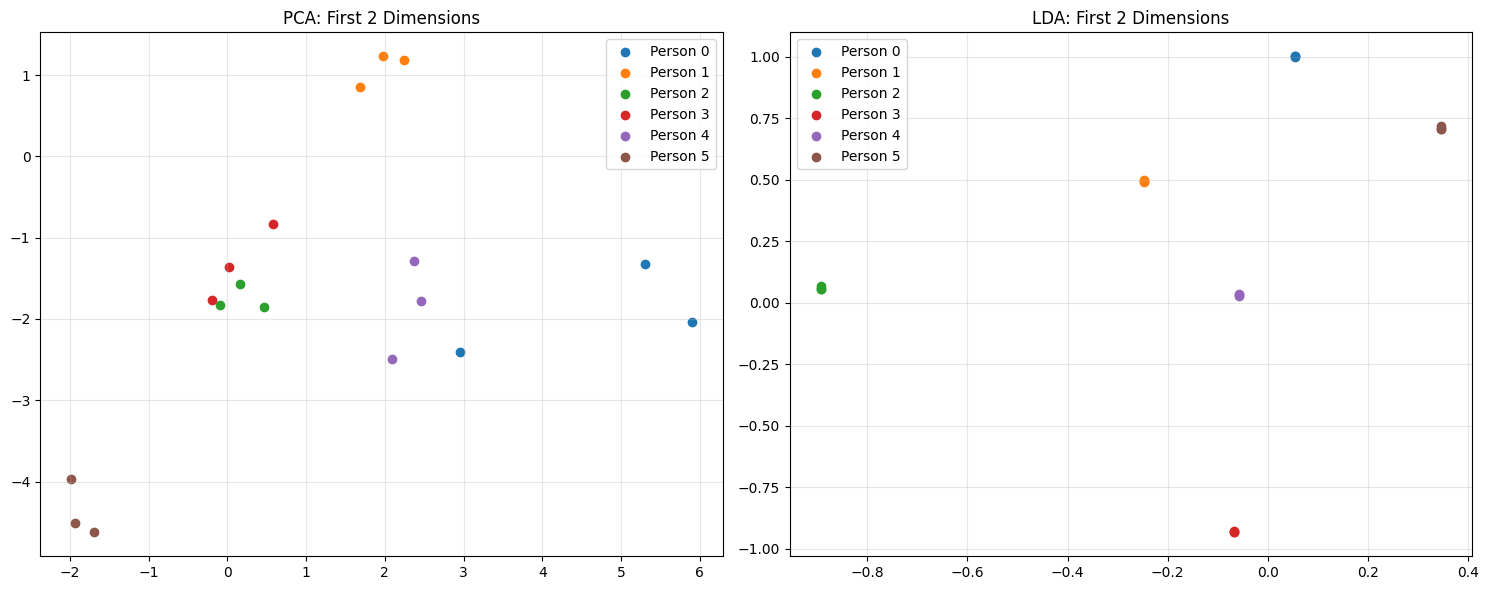

In [87]:
n_people = 6
img_per_person = 3

v_pca = v[:, :10]
T_reduced = calculate_projection_vectors(T, meanface, v_pca)
D_reduced = calculate_projection_vectors(D, meanface, v_pca)

w_lda = eigenvectorsLDA[:, :10]
T_fisher = np.real(T_reduced_LDA @ w_lda)
D_fisher = np.real(D_reduced_LDA @ w_lda)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PCA
for i in range(n_people):
    # D_reduced_LDA is the one we use PCA to project to 80 dimensions
    images = T_reduced[i * img_per_person:(i + 1) * img_per_person, :2] # first two LDA dimensions mean takes only first 2 columns
    axes[0].scatter(images[:, 0], images[:, 1], label=f"Person {i}")

axes[0].set_title("PCA: First 2 Dimensions")
axes[0].legend()
axes[0].grid(alpha=0.3)

# LDA
for i in range(n_people):
    images = T_fisher[i * img_per_person:(i + 1) * img_per_person, :2]
    axes[1].scatter(images[:, 0], images[:, 1], label=f"Person {i}")

axes[1].set_title("LDA: First 2 Dimensions")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()